



Epoch 1/15


981/981 [==============================] - 29s 27ms/step - loss: 2.0390 - accuracy: 0.4722 - val_loss: 0.6268 - val_accuracy: 0.8366
Epoch 2/15
981/981 [==============================] - 26s 27ms/step - loss: 0.8917 - accuracy: 0.7356 - val_loss: 0.3570 - val_accuracy: 0.9206
Epoch 3/15
981/981 [==============================] - 28s 28ms/step - loss: 0.6991 - accuracy: 0.7918 - val_loss: 0.2430 - val_accuracy: 0.9374
Epoch 4/15
981/981 [==============================] - 25s 25ms/step - loss: 0.5741 - accuracy: 0.8270 - val_loss: 0.2110 - val_accuracy: 0.9422
Epoch 5/15
981/981 [==============================] - 25s 26ms/step - loss: 0.5448 - accuracy: 0.8369 - val_loss: 0.1580 - val_accuracy: 0.9577
Epoch 6/15
981/981 [==============================] - 25s 26ms/step - loss: 0.4819 - accuracy: 0.8553 - val_loss: 0.1425 - val_accuracy: 0.9594
Epoch 7/15
981/981 [==============================] - 31s 32ms/step - loss: 0.4473 - accuracy: 0.8668 - val_loss: 0.1265 - val_acc

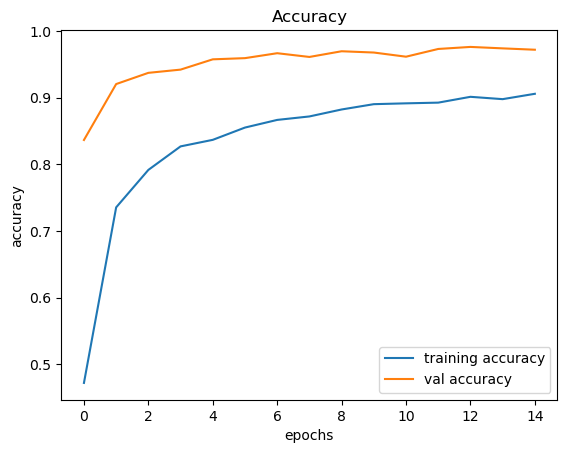

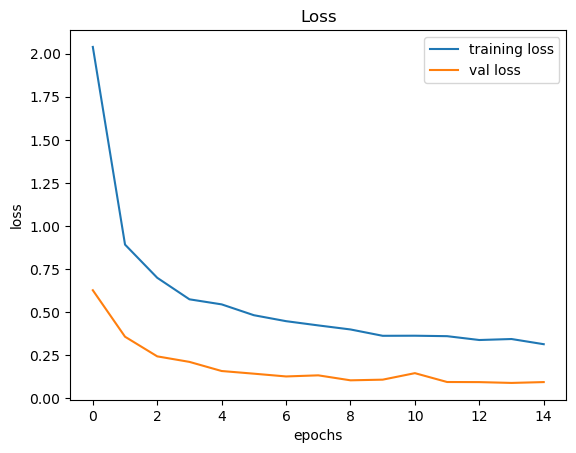

395/395 [==============================] - 5s 12ms/step
0.21797307996832938


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

data = []
labels = []
classes = 43
cur_path = os.getcwd()

warnings.filterwarnings("ignore")

# Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(os.path.join(path, a))
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

data = np.reshape(data, (data.shape[0], 30, 30, 3))

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Converting the labels into one-hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(30, 30, 3)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

# Save the model in the recommended format
model.save('traffic_classifier.keras')

# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing accuracy on the test dataset
y_test_data = pd.read_csv('Test.csv')
test_labels = y_test_data["ClassId"].values
test_imgs = y_test_data["Path"].values

test_data = []

for img in test_imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    test_data.append(np.array(image))

X_test_data = np.array(test_data)
X_test_data = np.reshape(X_test_data, (X_test_data.shape[0], 30, 30, 3))
X_test_data = X_test_data / 255.0

pred_probabilities = model.predict(X_test_data)
pred = np.argmax(pred_probabilities, axis=1)

# Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, pred))